# THINKIT

Team Leader: Mayank Dhama, 
Team Leader Email: 1905853@kiit.ac.in

Group Member Name: Divyesh Nag, 
Group Member Email: 1929013@kiit.ac.in

### Weather Forecasting (Using ML/AI)

In [1]:
import pandas as pd

In [2]:
# importing our csv file which contains different data inputs in advance

df = pd.read_csv("weather.csv")
df

,weathertype,temperature,humidity,wind,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
...,...,...,...,...,...
129,overcast,cool,normal,True,yes
130,overcast,mild,high,True,yes
131,overcast,hot,normal,False,yes
132,rainy,mild,high,False,yes


In [3]:
# importing required packages for calculation purpose

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [4]:
# reading weather.csv file which is being present in the directory

df = pd.read_csv("weather.csv")
df

,weathertype,temperature,humidity,wind,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
...,...,...,...,...,...
129,overcast,cool,normal,True,yes
130,overcast,mild,high,True,yes
131,overcast,hot,normal,False,yes
132,rainy,mild,high,False,yes


In [5]:
# changing the strings in the csv file to numerical for better results

weathertype_at = LabelEncoder()
temperature_at = LabelEncoder()
humidity_at = LabelEncoder()
wind_at = LabelEncoder()

In [6]:
# dropping the target variable and make it as newframe

inputs=df.drop('play',axis='columns')
target=df['play']
target

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
129    yes
130    yes
131    yes
132    yes
133    yes
Name: play, Length: 134, dtype: object

In [7]:
# creating the new dataframe for the given datasets in the csv file

inputs['weathertype_n']= weathertype_at.fit_transform(inputs['weathertype'])
inputs['temperature_n']= weathertype_at.fit_transform(inputs['temperature'])
inputs['humidity_n']= weathertype_at.fit_transform(inputs['humidity'])
inputs['wind_n']= weathertype_at.fit_transform(inputs['wind'])
inputs

,weathertype,temperature,humidity,wind,weathertype_n,temperature_n,humidity_n,wind_n
0,overcast,hot,high,False,0,1,0,0
1,overcast,cool,normal,True,0,0,1,1
2,overcast,mild,high,True,0,2,0,1
3,overcast,hot,normal,False,0,1,1,0
4,rainy,mild,high,False,1,2,0,0
...,...,...,...,...,...,...,...,...
129,overcast,cool,normal,True,0,0,1,1
130,overcast,mild,high,True,0,2,0,1
131,overcast,hot,normal,False,0,1,1,0
132,rainy,mild,high,False,1,2,0,0


In [8]:
# removing the string values and only preserving the newly created dataframe

inputs_n=inputs.drop(['weathertype','temperature','humidity','wind'],axis='columns')
inputs_n

,weathertype_n,temperature_n,humidity_n,wind_n
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
...,...,...,...,...
129,0,0,1,1
130,0,2,0,1
131,0,1,1,0
132,1,2,0,0


In [9]:
# applying the gaussian naivebayes theorem (i.multinomial ii.gaussian iii.bernoulli's)

classifier = GaussianNB()
classifier.fit(inputs_n,target)

GaussianNB()

In [10]:
# calculating accuracy for our model which is comming approx 90-93% 
# the accuracy may change as our model gets more training which can be done adding more data to the weather.csv file

classifier.score(inputs_n,target)      # multiply output with 100 to get the accuracy in percentage

0.9328358208955224

In [11]:
# final prediction

classifier.predict([[1,0,1,0]])         # we can change the values to see the output eg. ([[1,1,0,1]])

# if the array contents is yes then the play will take place else the play will not take place

array(['yes'], dtype='<U3')

### Weather Forecasting (Using API call)

In [12]:
# importing packages

import requests
import matplotlib.pyplot as plt

In [13]:
# taking the key from predefined api website

key = "f4a38d0984b8878e2c6f467241956f8c"
city= input("/n Enter city name --> ")                  # taking input as city from user
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}"
resp= requests.get(url)
if resp.status_code == 200:                             # if the status code is 200 then it would print all the weather information of that area
    print(resp.json())
else:
    print("\n URL IS NOT CORRECT OR SERVER IS NOT RESPONDING")

/n Enter city name --> delhi
{'coord': {'lon': 77.2167, 'lat': 28.6667}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 304.2, 'feels_like': 311.2, 'temp_min': 304.2, 'temp_max': 304.2, 'pressure': 1008, 'humidity': 79}, 'visibility': 3500, 'wind': {'speed': 2.06, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1633185953, 'sys': {'type': 1, 'id': 9165, 'country': 'IN', 'sunrise': 1633135467, 'sunset': 1633178184}, 'timezone': 19800, 'id': 1273294, 'name': 'Delhi', 'cod': 200}


In [14]:
# converting the information and storing in the data variable

data = resp.json()

In [15]:
# taking the data from the information which we got above 

desc = data['weather'][0]['description']
temp = round(data['main']['temp'] - 273.19, 2)                # calculating the temperature in celcius and rounding it off
temp_min = round(data['main']['temp_min'] - 273.19, 2)
temp_max = round(data['main']['temp_max'] - 273.19, 2)
humid = round(data['main']['humidity'])
country = data['sys']['country']
icon = data['weather'][0]['icon']                             # storing the icon value in icon variable 

/n Enter city name --> delhi
                              Description --> mist                              
                             Temperature --> 31.01                              
                           Temperature_Min --> 31.01                            
                           Temperature_Max --> 31.01                            
                                Humidity --> 79                                 
                                 Country --> IN                                 


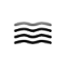

In [16]:
# merging all the above functions in one function and displaying the result of weather using api

def get_weather(city):
    key = "bfa9f5ebdf60b99754017b7827eed23e"
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}"
    resp = requests.get(url)
    if resp.status_code == 200:
        data = resp.json()
        desc = data['weather'][0]['description']
        temp = round(data['main']['temp'] - 273.19, 2)
        temp_min = round(data['main']['temp_min'] - 273.19, 2)
        temp_max = round(data['main']['temp_max'] - 273.19, 2)
        humid = round(data['main']['humidity'])
        country = data['sys']['country']
        icon = data['weather'][0]['icon']
        value = [desc, temp, temp_min, temp_max, humid ,country]
        name = ['Description', 'Temperature', 'Temperature_Min', 'Temperature_Max', 'Humidity', 'Country']
        
        # taking the variable name and value in x and y for displaying
        for x, y in zip(name, value):
            print(f"{x} --> {y}".center(80))
        url = f"http://openweathermap.org/img/w/{icon}.png"
        resp = requests.get(url)                                # requesting the url for api call
        with open(f"{city}.png", 'wb') as file:
            file.write(resp.content)
        
        # showing the icon 
        plt.figure(figsize=(1,1))
        img = plt.imread(f"{city}.png")
        plt.imshow(img)
        plt.axis("off") # to not show the lines/spines and do disable the ticks
        plt.show()
    else:
        print("/n URL IS NOT CORRECT OR SERVER IS NOT RESPONDING")
    

city= input("/n Enter city name --> ")
get_weather(city)                                 # calling the function